In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [2]:
ds = pd.read_csv("House_Price_dataset.csv")

In [3]:
ds

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4.0,2.0,3.0,yes,no,no,no,yes,2.0,yes,furnished
1,12250000,8960,4.0,4.0,4.0,yes,no,no,no,yes,3.0,no,furnished
2,12250000,9960,3.0,2.0,2.0,yes,no,yes,no,no,2.0,yes,semi-furnished
3,12215000,7500,4.0,2.0,2.0,yes,no,yes,no,yes,3.0,yes,furnished
4,11410000,7420,4.0,1.0,2.0,yes,yes,yes,no,yes,2.0,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2.0,1.0,1.0,yes,no,yes,no,no,2.0,no,unfurnished
541,1767150,2400,3.0,1.0,1.0,no,no,no,no,no,0.0,no,semi-furnished
542,1750000,3620,2.0,1.0,1.0,yes,no,no,no,no,0.0,no,unfurnished
543,1750000,2910,3.0,1.0,1.0,no,no,no,no,no,0.0,no,furnished


In [4]:
ds.shape

(545, 13)

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              545 non-null    int64  
 2   bedrooms          540 non-null    float64
 3   bathrooms         540 non-null    float64
 4   stories           543 non-null    float64
 5   mainroad          545 non-null    object 
 6   guestroom         545 non-null    object 
 7   basement          545 non-null    object 
 8   hotwaterheating   545 non-null    object 
 9   airconditioning   545 non-null    object 
 10  parking           541 non-null    float64
 11  prefarea          545 non-null    object 
 12  furnishingstatus  545 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 55.5+ KB


In [6]:
(ds==0).sum()

price                 0
area                  0
bedrooms              0
bathrooms             0
stories               0
mainroad              0
guestroom             0
basement              0
hotwaterheating       0
airconditioning       0
parking             297
prefarea              0
furnishingstatus      0
dtype: int64

In [7]:
ds.dtypes

price                 int64
area                  int64
bedrooms            float64
bathrooms           float64
stories             float64
mainroad             object
guestroom            object
basement             object
hotwaterheating      object
airconditioning      object
parking             float64
prefarea             object
furnishingstatus     object
dtype: object

In [8]:
ds.isna().sum()

price               0
area                0
bedrooms            5
bathrooms           5
stories             2
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             4
prefarea            0
furnishingstatus    0
dtype: int64

In [9]:
ds.select_dtypes(include = 'float64').median()

bedrooms     3.0
bathrooms    1.0
stories      2.0
parking      0.0
dtype: float64

In [10]:
for column in ds.columns:
  if ds[column].isna().any():
    if ds[column].dtype == 'float64':
      ds[column] = ds[column].fillna(ds[column].median())
    if ds[column].dtype == 'object':
      ds[column] = ds[column].fillna(ds[column].mode())
    else:
      ds[column] = ds[column].fillna(ds[column].mean())

In [11]:
ds.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

<Axes: xlabel='furnishingstatus', ylabel='price'>

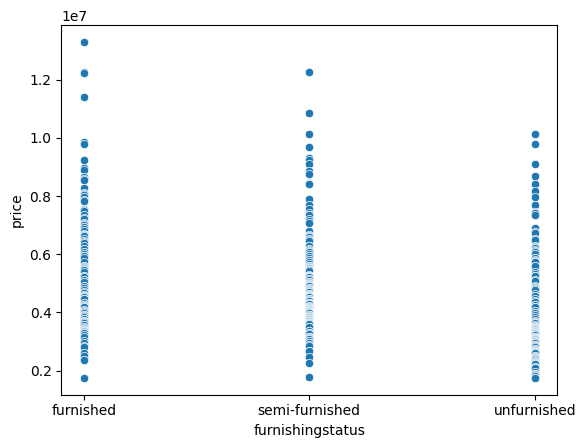

In [12]:
sb.scatterplot(data=ds, x='furnishingstatus', y='price')

In [13]:
ds


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4.0,2.0,3.0,yes,no,no,no,yes,2.0,yes,furnished
1,12250000,8960,4.0,4.0,4.0,yes,no,no,no,yes,3.0,no,furnished
2,12250000,9960,3.0,2.0,2.0,yes,no,yes,no,no,2.0,yes,semi-furnished
3,12215000,7500,4.0,2.0,2.0,yes,no,yes,no,yes,3.0,yes,furnished
4,11410000,7420,4.0,1.0,2.0,yes,yes,yes,no,yes,2.0,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2.0,1.0,1.0,yes,no,yes,no,no,2.0,no,unfurnished
541,1767150,2400,3.0,1.0,1.0,no,no,no,no,no,0.0,no,semi-furnished
542,1750000,3620,2.0,1.0,1.0,yes,no,no,no,no,0.0,no,unfurnished
543,1750000,2910,3.0,1.0,1.0,no,no,no,no,no,0.0,no,furnished


<Axes: xlabel='mainroad', ylabel='price'>

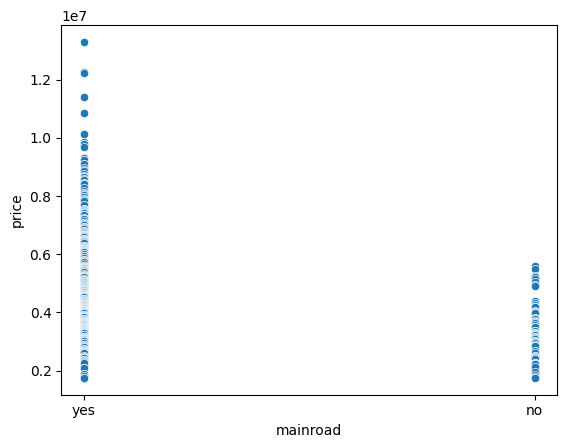

In [14]:
sb.scatterplot(data=ds, x='mainroad', y='price')

<Axes: xlabel='airconditioning', ylabel='price'>

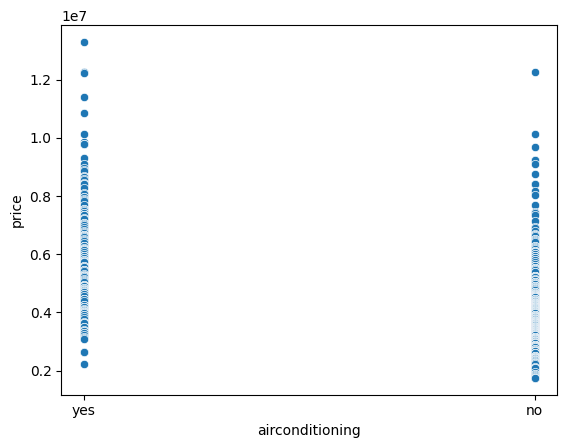

In [15]:
sb.scatterplot(data=ds, x='airconditioning', y='price')

<Axes: xlabel='area', ylabel='price'>

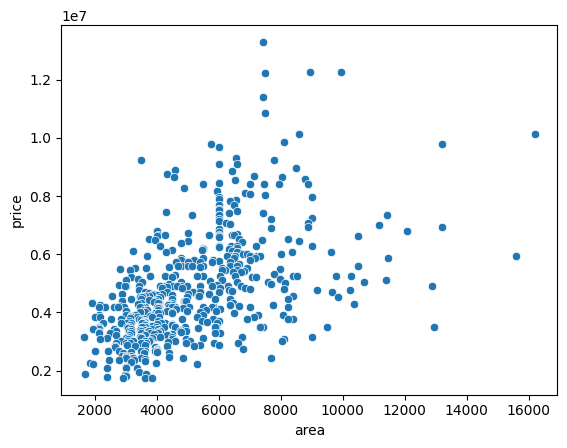

In [16]:
sb.scatterplot(data=ds, x='area', y='price')

<Axes: xlabel='area', ylabel='price'>

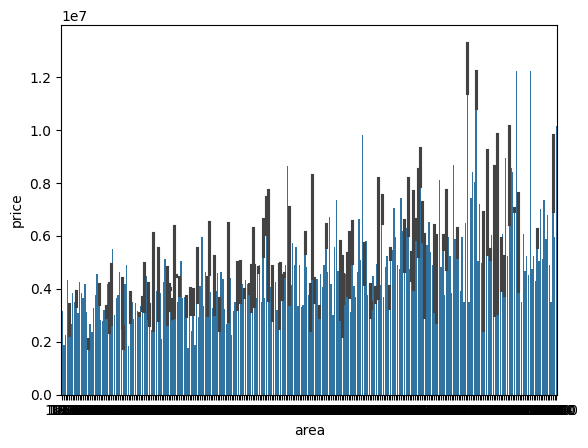

In [17]:
sb.barplot(data=ds, x='area', y='price')

In [27]:
ds3= ds.value_counts(ds['bedrooms'])
ds3

bedrooms
3.0    302
2.0    136
4.0     93
5.0     10
1.0      2
6.0      2
Name: count, dtype: int64

<Axes: xlabel='bedrooms'>

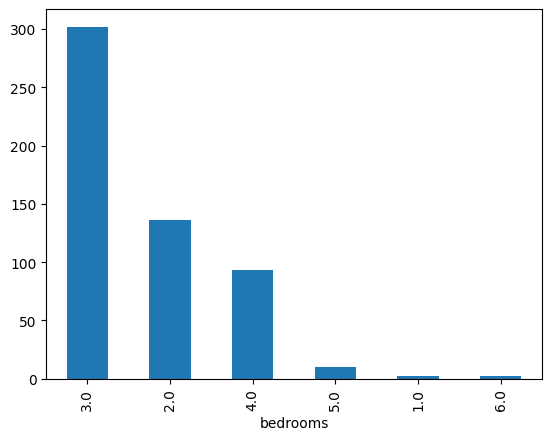

In [28]:
ds.value_counts(ds['bedrooms']).plot(kind= 'bar')

In [29]:
ds5= ds.value_counts(ds["parking"])
ds5

parking
0.0    301
1.0    126
2.0    106
3.0     12
Name: count, dtype: int64

<Axes: xlabel='parking'>

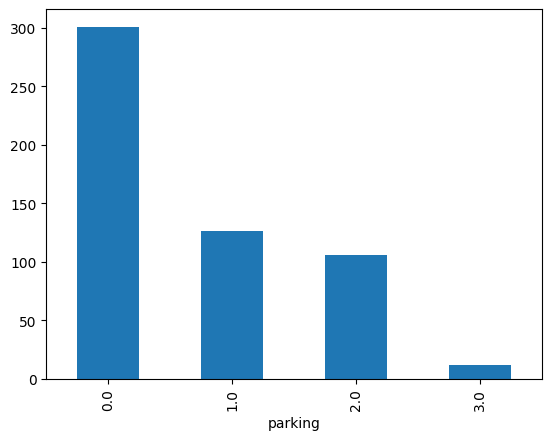

In [30]:
ds.value_counts(ds['parking']).plot(kind= 'bar')

In [31]:
ds4= ds.value_counts(ds["bathrooms"])
ds4

bathrooms
1.0    403
2.0    131
3.0     10
4.0      1
Name: count, dtype: int64

<Axes: xlabel='bathrooms'>

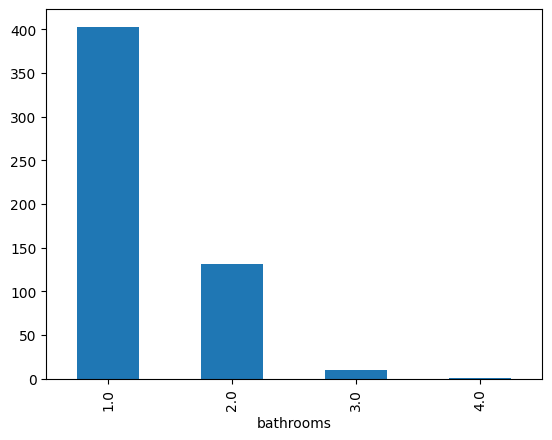

In [32]:
ds.value_counts(ds["bathrooms"]).plot(kind= 'bar')

In [33]:
ds6= ds[["parking", "price"]]
ds6

,parking,price
0,2.0,13300000
1,3.0,12250000
2,2.0,12250000
3,3.0,12215000
4,2.0,11410000
...,...,...
540,2.0,1820000
541,0.0,1767150
542,0.0,1750000
543,0.0,1750000


<Axes: xlabel='parking', ylabel='price'>

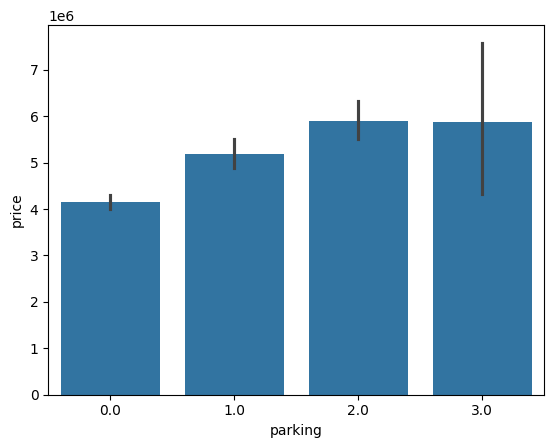

In [34]:
sb.barplot(data=ds6, x="parking", y="price" )

<Axes: xlabel='bedrooms', ylabel='price'>

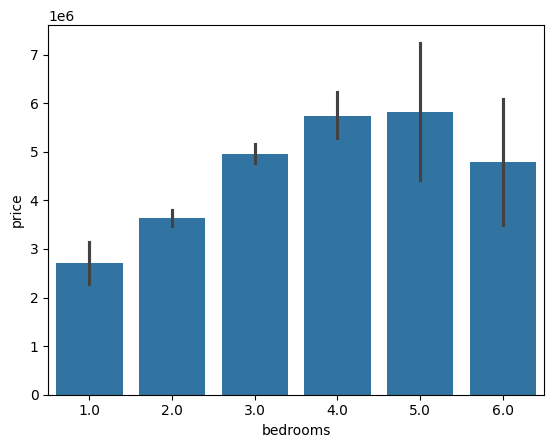

In [35]:
sb.barplot(data=ds, x="bedrooms", y="price" )

<Axes: xlabel='basement'>

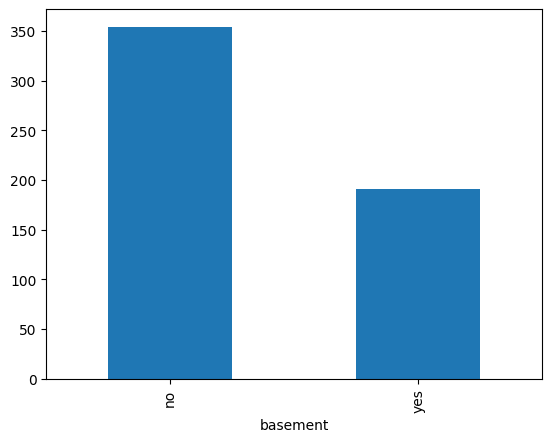

In [36]:
ds7= ds.value_counts(ds['basement'])
ds7
ds.value_counts(ds['basement']).plot(kind= 'bar')

In [37]:
ds6= ds[["area", "price"]]
ds6

,area,price
0,7420,13300000
1,8960,12250000
2,9960,12250000
3,7500,12215000
4,7420,11410000
...,...,...
540,3000,1820000
541,2400,1767150
542,3620,1750000
543,2910,1750000


In [38]:
le=LabelEncoder()

ds['basement'] = le.fit_transform(ds['basement']) 
ds['guestroom'] = le.fit_transform(ds['guestroom'])

ds['mainroad']=  le.fit_transform(ds["mainroad"])

ds['hotwaterheating'] = le.fit_transform(ds['hotwaterheating']) 
ds['airconditioning'] = le.fit_transform(ds['airconditioning'])

ds['prefarea'] = le.fit_transform(ds['prefarea'])

In [39]:
ds

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4.0,2.0,3.0,1,0,0,0,1,2.0,1,furnished
1,12250000,8960,4.0,4.0,4.0,1,0,0,0,1,3.0,0,furnished
2,12250000,9960,3.0,2.0,2.0,1,0,1,0,0,2.0,1,semi-furnished
3,12215000,7500,4.0,2.0,2.0,1,0,1,0,1,3.0,1,furnished
4,11410000,7420,4.0,1.0,2.0,1,1,1,0,1,2.0,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2.0,1.0,1.0,1,0,1,0,0,2.0,0,unfurnished
541,1767150,2400,3.0,1.0,1.0,0,0,0,0,0,0.0,0,semi-furnished
542,1750000,3620,2.0,1.0,1.0,1,0,0,0,0,0.0,0,unfurnished
543,1750000,2910,3.0,1.0,1.0,0,0,0,0,0,0.0,0,furnished


In [40]:
encoder =  OneHotEncoder(sparse_output=False)

In [41]:
encoded_furnishingstatus = encoder.fit_transform(ds[['furnishingstatus']])
encoded_data = pd.DataFrame(encoded_furnishingstatus, columns=encoder.get_feature_names_out(['furnishingstatus']))


ds = pd.concat([ds, encoded_data], axis=1)

ds = ds.drop(ds[['furnishingstatus']], axis=1)



In [42]:
ds.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4.0,2.0,3.0,1,0,0,0,1,2.0,1,1.0,0.0,0.0
1,12250000,8960,4.0,4.0,4.0,1,0,0,0,1,3.0,0,1.0,0.0,0.0
2,12250000,9960,3.0,2.0,2.0,1,0,1,0,0,2.0,1,0.0,1.0,0.0
3,12215000,7500,4.0,2.0,2.0,1,0,1,0,1,3.0,1,1.0,0.0,0.0
4,11410000,7420,4.0,1.0,2.0,1,1,1,0,1,2.0,0,1.0,0.0,0.0


In [43]:
x_data = ds[['area']] #feature
y_data = ds['price']  #target_variabe

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)


In [63]:
reg= LinearRegression()

In [64]:
model = reg.fit(X_train.values, y_train.values)

In [67]:
y_pred =reg.predict(X_test.values)


In [68]:
mse=mean_squared_error(y_test, y_pred)
mae= mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [69]:
print(f"Simple Linear Regression MSE: {mse}, MAE:{mae}, R-Squared: {r2}")

Simple Linear Regression MSE: 3675286604768.185, MAE:1474748.1337969352, R-Squared: 0.27287851871974644


In [49]:
pred1 =  model.predict([[2910]])
pred1


array([3751128.1040012])

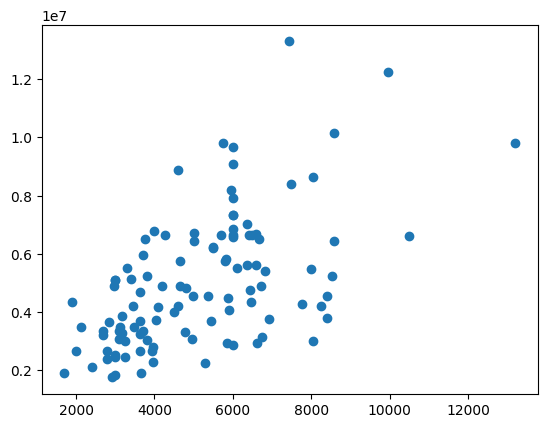

In [50]:
plt.scatter (X_test, y_test, label='Price')
plt.show()

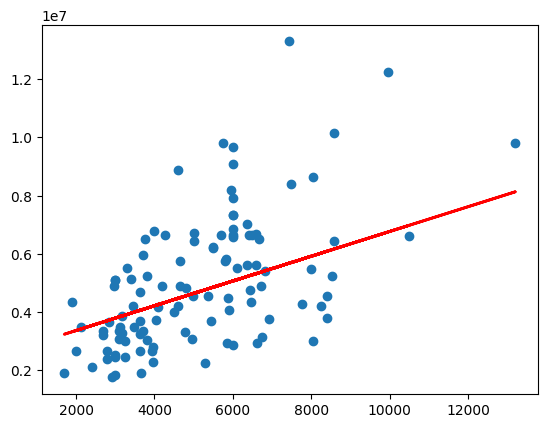

In [51]:
plt.scatter (X_test, y_test,  label='Price')

plt.plot(X_test.values[:,:], y_pred, color='red', linewidth=2, label='Line')
plt.show()

In [72]:
ds.isna().sum()


price                              0
area                               0
bedrooms                           0
bathrooms                          0
stories                            0
mainroad                           0
guestroom                          0
basement                           0
hotwaterheating                    0
airconditioning                    0
parking                            0
prefarea                           0
furnishingstatus_furnished         0
furnishingstatus_semi-furnished    0
furnishingstatus_unfurnished       0
dtype: int64

In [73]:
corr_mat['price']

price                              1.000000
area                               0.535997
bedrooms                           0.366420
bathrooms                          0.509123
stories                            0.420712
mainroad                           0.296898
guestroom                          0.255517
basement                           0.187057
hotwaterheating                    0.093073
airconditioning                    0.452954
parking                            0.382167
prefarea                           0.329777
furnishingstatus_furnished         0.229350
furnishingstatus_semi-furnished    0.063656
furnishingstatus_unfurnished      -0.280587
Name: price, dtype: float64

In [74]:
X_multiple = ds[['area', 'bathrooms', 'stories', 'airconditioning', 'parking', 'bedrooms', 'mainroad', 'prefarea']]
y_multiple = ds['price']



In [82]:
X_multiple


,area,bathrooms,stories,airconditioning,parking,bedrooms,mainroad,prefarea
0,7420,2.0,3.0,1,2.0,4.0,1,1
1,8960,4.0,4.0,1,3.0,4.0,1,0
2,9960,2.0,2.0,0,2.0,3.0,1,1
3,7500,2.0,2.0,1,3.0,4.0,1,1
4,7420,1.0,2.0,1,2.0,4.0,1,0
...,...,...,...,...,...,...,...,...
540,3000,1.0,1.0,0,2.0,2.0,1,0
541,2400,1.0,1.0,0,0.0,3.0,0,0
542,3620,1.0,1.0,0,0.0,2.0,1,0
543,2910,1.0,1.0,0,0.0,3.0,0,0


In [83]:
y_multiple


0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [75]:
X_train_mul, X_test_mul, y_train_mul, y_test_mul = train_test_split(X_multiple, y_multiple, test_size=0.2, random_state=42)



In [76]:
reg_mul= LinearRegression()


In [77]:
model_1 =reg_mul.fit(X_train_mul.values, y_train_mul.values)


In [78]:
y_pred_mul =reg_mul.predict(X_test_mul.values)



In [79]:
mse_mul = mean_squared_error(y_test_mul, y_pred_mul) 
mae_mul = mean_absolute_error(y_test_mul, y_pred_mul)
r2_mul = r2_score(y_test_mul, y_pred_mul)



In [80]:
print(f"Multiple Regression MSE: {mse_mul}, MAE: {mae_mul}, R-Squared: {r2_mul}")


Multiple Regression MSE: 1898675161286.13, MAE: 1027777.791435098, R-Squared: 0.624364670240058


In [85]:
pred2 = model_1.predict([[7420,1.0,2.0,1,2.0,4.0,1,0]])

pred2

array([5987854.44309022])